# Lab 1
Reimplementing lab 1 from the DME labs

In [1]:
from __future__ import division, print_function
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from astropy.io import ascii
from utils import col_names, relevant_indices
import math
%matplotlib inline

In [2]:
datasets = "../datasets/SuperCOSMOS/"

In [3]:
uki823_df = ascii.read(datasets + "UKI823/sssedrpair.dat").to_pandas()
uki823_df.columns = col_names

In [4]:
uki823_rel_df = uki823_df.iloc[:, relevant_indices]

In [5]:
uki823_rel_df.head()

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
0,161,42793408,-22923,17532226,7978,6626,166,4944,4524,177,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,46,5089298,-20025,18211806,4852,3506,128,4419,3052,133,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,87,17260390,-21479,17841694,6028,4991,119,4327,3762,121,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,57,7749678,-20599,18688688,4842,3961,120,3950,3318,119,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,84,14814466,-21295,17692354,5907,4798,18,4325,3741,18,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6


In [6]:
uki823_rel_df = uki823_df.iloc[:, relevant_indices]
uki823_rel_df.head()
# uki823_rel_df.shape[1]

,AREA,IPEAK,COSMAG,ISKY,A_U,B_U,THETA_U,A_I,B_I,THETA_I,...,"N(0,1)",PRFMAG,C_COSMAG,C_PRFMAG,RA_SDSS,DEC_SDSS,GMAG_SDSS,RMAG_SDSS,IMAG_SDSS,CLASS_SDSS
0,161,42793408,-22923,17532226,7978,6626,166,4944,4524,177,...,-777,-23019,15.639,14.998,359.763288,-1.067042,19.127230,17.637123,15.888538,6
1,46,5089298,-20025,18211806,4852,3506,128,4419,3052,133,...,4639,-20435,17.703,17.800,359.880409,-0.379610,19.122244,18.505545,18.302338,6
2,87,17260390,-21479,17841694,6028,4991,119,4327,3762,121,...,-51,-21669,16.723,16.460,359.929869,-0.616716,19.118631,17.716108,17.013582,6
3,57,7749678,-20599,18688688,4842,3961,120,3950,3318,119,...,-259,-20958,17.357,17.232,359.996295,-0.297037,19.114597,18.120455,17.692406,6
4,84,14814466,-21295,17692354,5907,4798,18,4325,3741,18,...,111,-21519,16.848,16.623,359.369486,-0.591688,19.112507,17.852146,17.173191,6


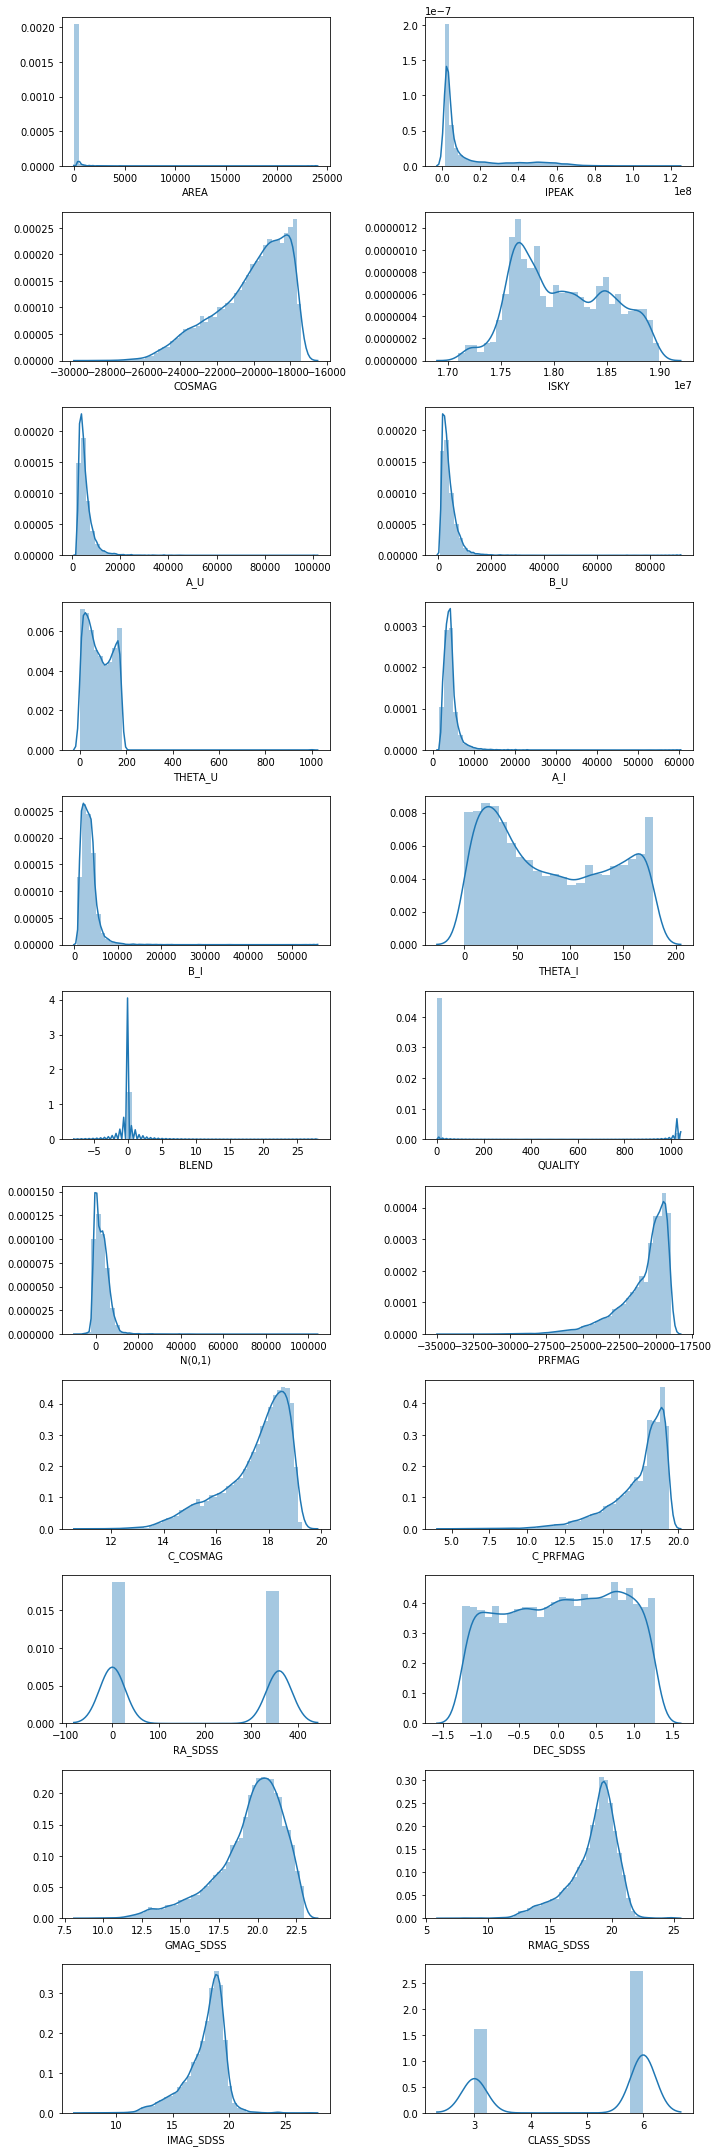

In [7]:
fig, ax = plt.subplots(math.floor(uki823_rel_df.shape[1]/2), 2, figsize=(10,30))

for ii, col in enumerate(uki823_rel_df):
    sns.distplot(uki823_rel_df[col], ax=ax[math.floor(ii / 2)][ii % 2])
    
fig.tight_layout()
plt.show()

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


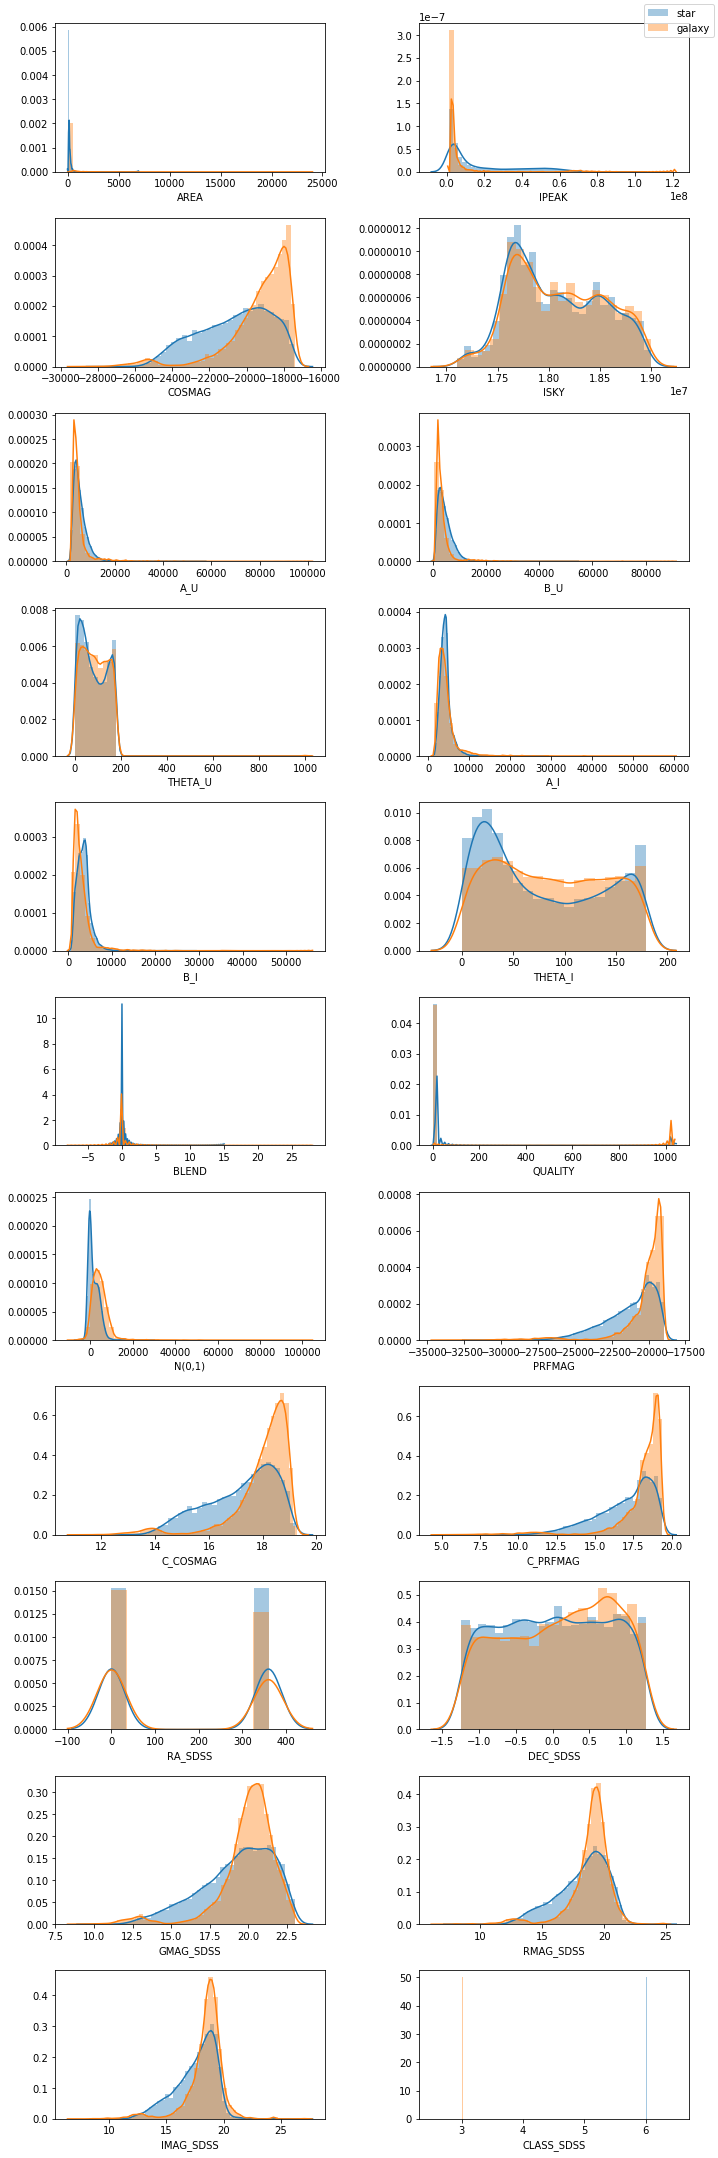

In [8]:
width = 2
fig, ax = plt.subplots(math.floor(uki823_rel_df.shape[1]/width), width, figsize=(10,30))

for ii, col in enumerate(uki823_rel_df):
    sns.distplot(uki823_rel_df[col][uki823_rel_df.CLASS_SDSS == 6], ax=ax[math.floor(ii / width)][ii % width], label="star")
    sns.distplot(uki823_rel_df[col][uki823_rel_df.CLASS_SDSS == 3], ax=ax[math.floor(ii / width)][ii % width], label="galaxy")
    
fig.legend(("star", "galaxy"))
fig.tight_layout()
plt.show()

In [28]:
def scatter_2d_label(X_2d, y, s=2, alpha=0.5, lw=2):
    """Visualuse a 2D embedding with corresponding labels.
    
    X_2d : ndarray, shape (n_samples,2)
        Low-dimensional feature representation.
    
    y : ndarray, shape (n_samples,)
        Labels corresponding to the entries in X_2d.
        
    s : float
        Marker size for scatter plot.
    
    alpha : float
        Transparency for scatter plot.
        
    lw : float
        Linewidth for scatter plot.
    """
    targets = np.unique(y)
    colors = sns.color_palette(n_colors=targets.size)
    for color, target in zip(colors, targets):
        plt.scatter(X_2d[y == target, 0], X_2d[y == target, 1], color=color, label=target, s=s, alpha=alpha, lw=lw)

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/ipykernel_launcher.py:22: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


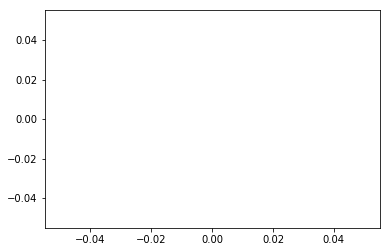

In [19]:
x_uki823 = uki823_rel_df[['AREA', 'IPEAK', 'COSMAG', 'ISKY', 'A_U', 'B_U', 'THETA_U', 'A_I',
       'B_I', 'THETA_I', 'BLEND', 'QUALITY', 'N(0,1)', 'PRFMAG', 'C_COSMAG',
       'C_PRFMAG']].values
x_uki823 = StandardScaler().fit_transform(x_uki823)

y_uki823 = uki823_rel_df.CLASS_SDSS.values

x_pca_uki823 = PCA(n_components=2).fit_transform(x_uki823)

scatter_2d_label(x_pca_uki823[:, [0,1]], y_uki823)

/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/phil/anaconda3/envs/dme-mini-project/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


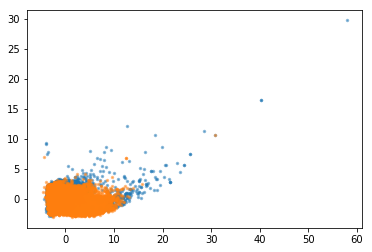

In [33]:
X = uki823_rel_df.drop("CLASS_SDSS", axis=1)
y = uki823_rel_df.CLASS_SDSS

X_sc = StandardScaler().fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X_sc)
scatter_2d_label(X_pca[:, [0,1]], y)

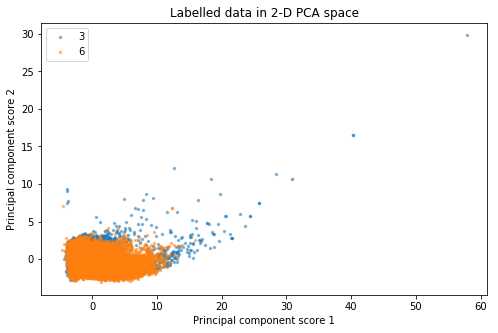

In [43]:
data_x = uki823_rel_df.iloc[:,0:len(uki823_rel_df.columns)-1].astype('float64')
y = uki823_rel_df['CLASS_SDSS']

data_x = StandardScaler().fit_transform(data_x)

dim_1 = 0 # First dimension
dim_2 = 1 # Second dimension
X_pca_4d = PCA(n_components=21).fit_transform(data_x) # Initialise a PCA instance, fit it by using X_sc and then transform X_sc
plt.figure(figsize=(8,5))
scatter_2d_label(X_pca_4d[:, [dim_1,dim_2]], y)
plt.title('Labelled data in 2-D PCA space')
plt.xlabel('Principal component score 1')
plt.ylabel('Principal component score 2')
plt.legend(loc='best') # Ask matplotlib to place the legend where it thinks best
plt.show()